# Summary

The goal is to predict the direction of the daily percentage return -- discrete variable with values {"Up", "Down"} -- from the returns of prervious days. Example based on Standford course in Statistical Learning. 

# Load data set

In [ ]:
# Install ISLR package from CRAN to access data set
install.packages("ISLR")

**Smarket**: 

Daily percentage returns for the S&P 500 stock index between 2001 and 2005.
A data frame with 1250 observations on the following 9 variables:

* Year: The year that the observation was recorded

* Lag1: Percentage return for previous day

* Lag2: Percentage return for 2 days previous

* Lag3: Percentage return for 3 days previous

* Lag4: Percentage return for 4 days previous

* Lag5: Percentage return for 5 days previous

* Volume: Volume of shares traded (number of daily shares traded in billions)

* Today: Percentage return for today

* Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day



In [ ]:
require(ISLR) # same as library
# ?Smarket
print('Variables: ')
names(Smarket)
attach(Smarket)

# Data visualization

Scatter plot of all variables using color coding of the Direction variable.

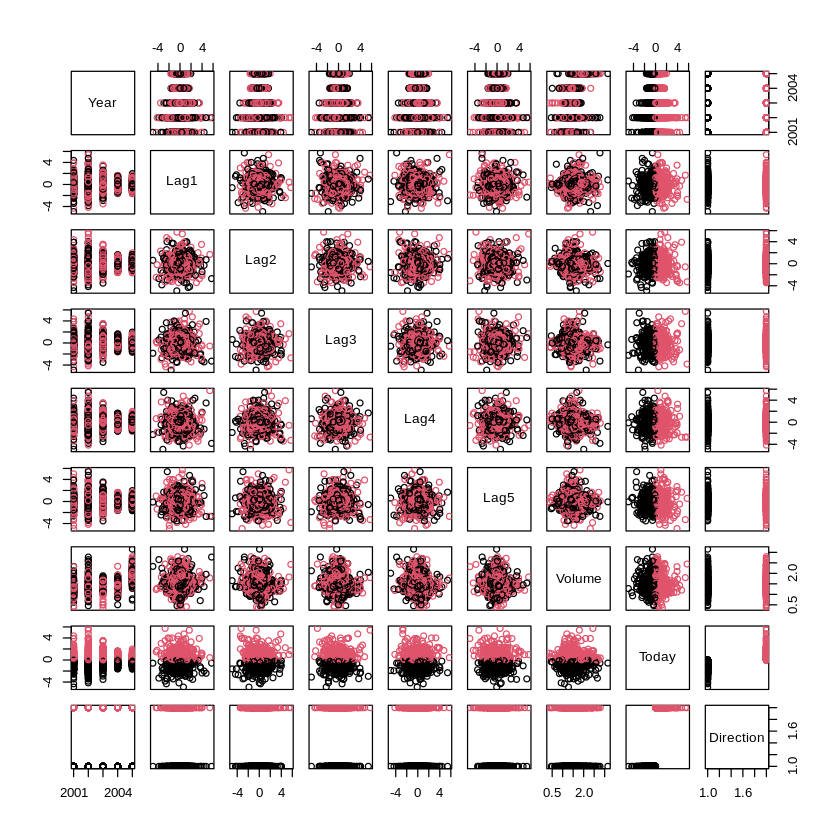

In [ ]:
plot(Smarket, col=Smarket$Direction)

In [ ]:
# Scatter plots
plot(Smarket[,c(1,2,3,7,8)])

Visualize scatter plots for the closest days only. Install "psych" package (A general purpose toolbox for personality, psychometric theory and experimental psychology. Functions for multivariate analysis and basic descriptive statistics)

In [ ]:
install.packages("psych",dependencies=TRUE)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘pbivnorm’, ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’




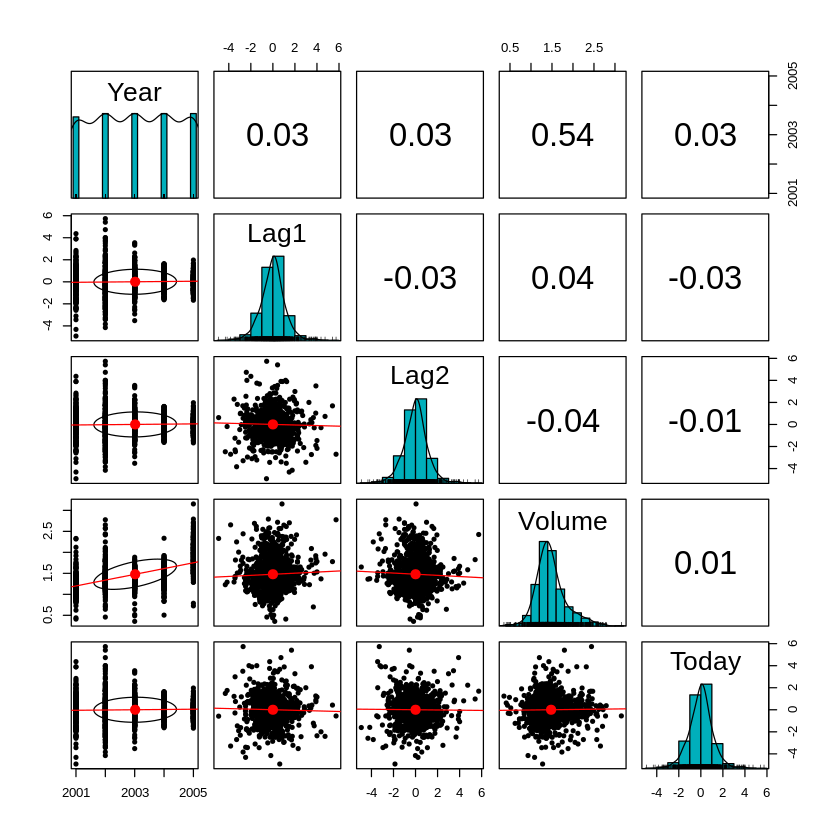

In [ ]:
pairs.panels(Smarket[,c(1,2,3,7,8)], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             lm=TRUE, # lin fit
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)

Correlations between numeric variables:

In [ ]:
cor(Smarket[,-9])


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


There is not correlation between today’s returns and previous days’ returns (0.02-0.006), as expected from perfect market theory (if market opportunities existed, they will be exploited and so removed). Only correlation between year and volume exist, as trades increase with years. 

# Split data

In [ ]:
train = Year<2005
test = Year==2005
Smarket.train = subset(Smarket,Year<2005)
Smarket.test = subset(Smarket,Year==2005)
Direction.test = Direction[test]

# Predict using logistic regression

Logistic regression using generalized linear model with *binomial* (logistic). Regress *Direction* on all *Lags* and *Volume* using training data.   

In [ ]:
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial, subset = train)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


The smallest $p$-value is for *Lag1* with negative sign but it has a large value so there is no clear association. 

Estimate the conditional probability $Pr(Y=1|x)$ for $Y=1$ being an "Up" change on test data. 

In [ ]:
# Predict conditional probability Pr(Y=1|x)
# glm.probs = predict(glm.fit, newdata = Smarket[!train,], type="response") 
glm.probs = predict(glm.fit, newdata = Smarket.test, type="response") 
glm.probs[1:10]
print(paste0('mean[Pr(Y=1|x)]=', mean(glm.probs)))

999      1000      1001      1002      1003      1004      1005      1006 
0.5282195 0.5156688 0.5226521 0.5138543 0.4983345 0.5010912 0.5027703 0.5095680 
     1007      1008 
0.5040112 0.5106408

[1] "mean[Pr(Y=1|x)]=0.491737005231626"


Threshold to transform probabilities into classification responses: 

In [ ]:
# Treshold is used to transform probability into classication
#glm.pred = rep("Down", 1250)
#glm.pred[glm.probs>0.5]="Up"
glm.pred = ifelse(glm.probs>0.5,"Up","Down")

Compute confussion matrix:

In [ ]:
# Create confusion matrix
print('Confussion matrix: ')
table(glm.pred, Direction.test)
print(paste0('Percentage of correct outputs: ', mean(glm.pred==Direction.test)))

[1] "Confussion matrix: "


        Direction.test
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] "Percentage of correct outputs: 0.48015873015873"


The percentage of correct outputs is even less than random guessing (50 %). As many variables are not relevant, we repeat the fit using only *Lag1* and *Lag2*. 

In [ ]:
# Fit and predict
glm.fit = glm(Direction~Lag1+Lag2, data=Smarket, family=binomial, subset = train)
glm.probs = predict(glm.fit, newdata = Smarket.test, type="response") 
glm.pred = ifelse(glm.probs>0.5,"Up","Down")

# Create confusion matrix
print('Confussion matrix: ')
glm.table = table(glm.pred, Direction.test)
glm.table
print(paste0('Percentage of correct outputs: ', mean(glm.pred==Direction.test)))

[1] "Confussion matrix: "


        Direction.test
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] "Percentage of correct outputs: 0.55952380952381"


Results are slightly better than before but worse than predicting that the market will increase every day (long term market increase)!!!

In [ ]:
# Predicting that market will increase every day has same test error
106/(76+106)

[1] 0.5824176

# Predict using LDA

Fit using linear discriminant analysis. It outputs the prior probabilities of the two groups, which can be plotted. 

In [ ]:
require(MASS)

In [ ]:
## Linear Discriminant Analysis
lda.fit=lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

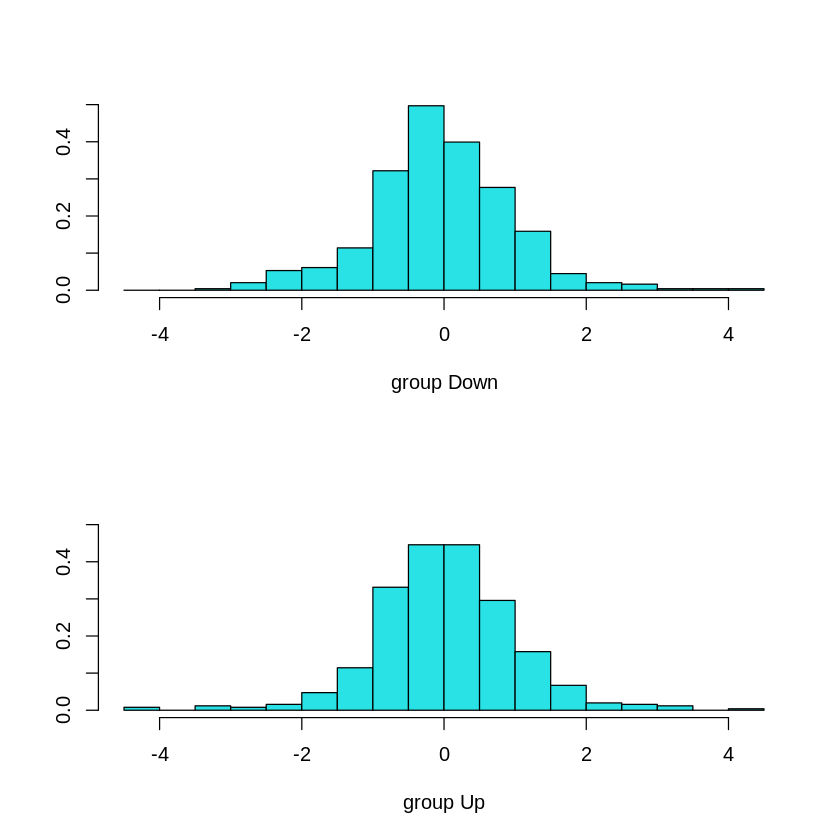

In [ ]:
plot(lda.fit)

In [ ]:
lda.pred=predict(lda.fit,Smarket.test)
# names(lda.pred)
data.frame(lda.pred)[1:5,]

[1] "class"     "posterior" "x"

,class,posterior.Down,posterior.Up,LD1
,<fct>,<dbl>,<dbl>,<dbl>
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892


In [ ]:
lda.pred$posterior[1:10,1]
lda.pred$class[1:10]

999      1000      1001      1002      1003      1004      1005      1006 
0.4901792 0.4792185 0.4668185 0.4740011 0.4927877 0.4938562 0.4951016 0.4872861 
     1007      1008 
0.4907013 0.4844026

[1] Up Up Up Up Up Up Up Up Up Up
Levels: Down Up

In [ ]:
print('Confussion matrix: ')
table(lda.pred$class, Direction.test)

[1] "Confussion matrix: "


      Direction.test
       Down  Up
  Down   35  35
  Up     76 106